In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Data.csv', encoding = "ISO-8859-1")
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [18]:
train_data= data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

In [26]:
train= train_data.iloc[:, 2:-1]
train.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [29]:
train.columns

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24'],
      dtype='object')

In [33]:
list1=[str(i) for i in range(1, 25)]
train.columns= list1

In [52]:
for index in list1:
    train[index]=train[index].str.lower()
    

In [87]:
headline=[]
for row in range(0, len(train.index)):
    headline.append(''.join(str(x) for x in train.iloc[row, :]))

In [81]:
headline[3]

'pilgrim knows how to progressthatcher facing banmcilroy calls for irish fighting spiritleicester bin stadium blueprintunited braced for mexican waveauntie back in fashion  even if the dress looks a bit tattyshoaib appeal goes to the tophussain hurt by  shambles  but lays blame on earlier damageengland s decade of disastersrevenge is sweet for jubilant cronjeour choice  not theirsprofile of former us nazi party officer william piercenew evidence shows record of war crimes suspect was not investigatedthe rise of the supernerdswritten on the bodyputin admits yeltsin quit to give him a head startbbc worst hit as digital tv begins to bitehow much can you pay for   christmas glitchesupending a table  chopping a line and scoring a goalscientific evidence  unreliable   defence claimsfusco wins judicial review in extradition caserebels thwart russian advanceblair orders shake up of failing nhs'

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [90]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headline)

In [96]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train_data['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [107]:
test = data[data['Date'] > '2014-12-31']
len(test.columns)

27

In [108]:
test1=[]

for r in range(0, len(test.index)):
    test1.append(''.join(str(x) for x in test.iloc[r,2:27]))

In [110]:
test1[2]

"US oil falls below $50 a barrelToyota gives away 5,680 fuel cell patents to build 'game-changing' car of the futureYoung Indian couple who had been granted police protection because relatives did not approve are hacked to death when officers refused to carry out judges ordersA senior figure in Islamic States self-declared police force in Syria, which has carried out beheadings, was himself found decapitated in the eastern province of Deir al-ZorFukushima rice passes radiation tests for 1st time since disasterNearly all Spanish parties guilty of financial crimes, Audit Court findsKing Abdullah to abdicate Saudi ThroneTaliban Commander Caught Networking On LinkedInMexican missing students: mayor's wife charged with organized crime and money launderingNew York Times reporter James Risen refused on Monday to answer all but a few basic questions in court about his book detailing a failed CIA effort to undermine Iran's nuclear weapons program, in a case that has become a flashpoint for pres

In [115]:
test_dataset = countvector.transform(test1)
pred= randomclassifier.predict(test_dataset)

In [116]:
print(pred)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 0]


In [117]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [119]:
matrix=confusion_matrix(test['Label'],pred)
print(matrix)
score=accuracy_score(test['Label'],pred)
print(score)



[[ 22 164]
 [ 20 172]]
0.5132275132275133


In [121]:
 import matplotlib.pyplot as plt 

<AxesSubplot:>

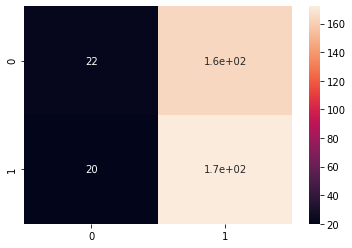

In [128]:
import seaborn as sns
sns.heatmap(matrix, annot=True)